<a href="https://colab.research.google.com/github/dsuwala/cmpp/blob/main/cmpp4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.animation import FuncAnimation
from matplotlib.animation import FFMpegWriter
from matplotlib.animation import PillowWriter 
import os

In [ ]:
#spell to have animations working
from matplotlib import rc
rc('animation', html='jshtml', embed_limit='4096')

In [ ]:
from google.colab import drive
drive.mount('/gdrive')

Mounted at /gdrive


In [ ]:
os.chdir("../gdrive/MyDrive/MISMaP/Lato22-23")

In [ ]:
!apt-get install ffmpeg

# 1D gray scott

In [ ]:
def get_second_derivative(f : np.ndarray, dr) -> np.ndarray:

    diff_f = ( np.roll(f, 1) - 2 * f + np.roll(f, -1) ) / (dr**2)

    return diff_f

In [ ]:
# evolve one step
def evolve(u : np.ndarray, v : np.ndarray, par : dict):

    u += par["Du"] * get_second_derivative(u, par["dr"]) - u * v * v + par["F"] * (1 - u) 
    v += par["Dv"] * get_second_derivative(v, par["dr"]) + u * v * v - (par["F"] + par["k"]) * v

    return u, v

In [ ]:
par = {
    "Du" : 2e-5, "Dv" : 1e-5, "dr" : 0.02,
    "F" : 0.037, "k" : 0.06, "steps" : 5000, "N" : 100
}

In [ ]:
u_init = np.ones(par["N"])
v_init = np.zeros(par["N"])
x = np.arange(par["N"])
for i in range(int(par["N"] / 4), int(3 * par["N"] / 4)):
    u_init[i] = np.random.random() * 0.2 + 0.4
    v_init[i] = np.random.random() * 0.2 + 0.2

In [ ]:
u_old = u_init
v_old = v_init

u = []
v = []

for step in range(par["steps"]):
    
    u_new, v_new = evolve(u_old, v_old, par)

    if step % 10 == 0:
        u.append(np.copy(u_new))
        v.append(np.copy(v_new))

    u_old = u_new
    v_old = v_new

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

def animate(i):

    ax.clear()

    ax.set_ylim(0, 1)
    ax.set_xlim(0, 100)
    ax.plot(x, u[i])
    ax.plot(x, v[i])
    ax.set_ylabel("concentration [1]")
    ax.set_xlabel("distance")

    ax.set_title(f"step: {10 * i}, F = {par['F']}, k = {par['k']}")
    
    # ax[1].contourf(x, range(par["steps"]), np.random.random((2, 2)))#np.concatenate( range(par["steps"]), v_new ) )
    
    # plt.show()

anim = FuncAnimation(fig, animate, interval=100, frames=int(par["steps"] / 10))
plt.close()

anim.save(f"./1Dgray_scott_F{par['F']}_k{par['k']}.gif", writer=PillowWriter(fps=60))

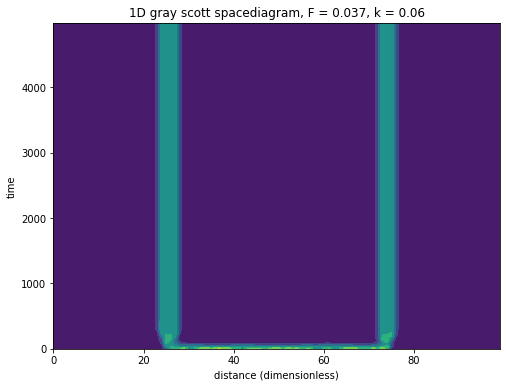

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))
V = np.vstack(v)

ax.contourf(x, range(0, par["steps"], 10), V)
ax.set_ylabel("time")
ax.set_xlabel("distance (dimensionless)")
ax.set_title(f"1D gray scott spacediagram, F = {par['F']}, k = {par['k']}")

fig.savefig(f"./1D_spacediagram_F{par['F']}_k{par['k']}.png")


# 2D Gray scot

In [ ]:
def get_laplacian(f: np.ndarray, dr) -> np.ndarray:

    lapf_x = ( np.roll(f, 1, axis=1) - 2 * f + np.roll(f, -1, axis=1) ) / (dr**2)
    lapf_y = ( np.roll(f, 1, axis=0) - 2 * f + np.roll(f, -1, axis=0) ) / (dr**2)

    return lapf_x + lapf_y

In [ ]:
# evolve one step
def evolve2D(u : np.ndarray, v : np.ndarray, par : dict):

    u += par["Du"] * get_laplacian(u, par["dr"]) - u * v * v + par["F"] * (1 - u) 
    v += par["Dv"] * get_laplacian(v, par["dr"]) + u * v * v - (par["F"] + par["k"]) * v

    return u, v

In [ ]:
par = {
    "Du" : 2e-5, "Dv" : 1e-5, "dr" : 0.02,
    "F" : 0.037, "k" : 0.06, "steps" : 10000, "N" : 100
}

In [ ]:
u_init = np.ones((par["N"], par["N"]))
v_init = np.zeros((par["N"], par["N"]))

x = np.arange(par["N"])
for i in range(int(par["N"] / 4), int(3 * par["N"] / 4)):
    for j in range(int(par["N"] / 4), int(3 * par["N"] / 4)):
        u_init[i, j] = np.random.random() * 0.2 + 0.4
        v_init[i, j] = np.random.random() * 0.2 + 0.2

In [ ]:
u_old = u_init
v_old = v_init

u = []
v = []

for step in range(par["steps"]):
    
    u_new, v_new = evolve2D(u_old, v_old, par)

    if step % 50 == 0:
        u.append(np.copy(u_new))
        v.append(np.copy(v_new))

    u_old = u_new
    v_old = v_new

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

def animate(i):

    ax.clear()

    ax.set_ylim(0, 100)
    ax.set_xlim(0, 100)
    cax = ax.imshow(u[i], interpolation="nearest")
    cax.set_clim(vmin=0, vmax=1)
    # ax.plot(x, v[i])
    ax.set_ylabel("y")
    ax.set_xlabel("x")

    ax.set_title(f"step: {10 * i}, F = {par['F']}, k = {par['k']}")
    
    # ax[1].contourf(x, range(par["steps"]), np.random.random((2, 2)))#np.concatenate( range(par["steps"]), v_new ) )
    
    # plt.show()

anim = FuncAnimation(fig, animate, interval=100, frames=len(u))
plt.close()

anim.save(f"./2D_gs_F{par['F']}_k{par['k']}.gif", writer=PillowWriter(fps=60))

# 2D Gray Scott with systematic F change

In [ ]:
def get_laplacian(f: np.ndarray, dr) -> np.ndarray:

    lapf_x = ( np.roll(f, 1, axis=1) - 2 * f + np.roll(f, -1, axis=1) ) / (dr**2)
    lapf_y = ( np.roll(f, 1, axis=0) - 2 * f + np.roll(f, -1, axis=0) ) / (dr**2)

    return lapf_x + lapf_y

In [ ]:
# evolve one step
def evolve2D(u : np.ndarray, v : np.ndarray, par : dict):

    u += par["Du"] * get_laplacian(u, par["dr"]) - u * v * v + par["F"] * (1 - u) 
    v += par["Dv"] * get_laplacian(v, par["dr"]) + u * v * v - (par["F"] + par["k"]) * v

    return u, v

In [ ]:
par = {
    "Du" : 2e-5, "Dv" : 1e-5, "dr" : 0.02,
    "F" : 0.022, "k" : 0.0610, "steps" : 10000, "N" : 100
}
par1 = {
    "Du" : 2e-5, "Dv" : 1e-5, "dr" : 0.02,
    "F" : 0.038, "k" : 0.0610, "steps" : 10000, "N" : 100
}
par2 = {
    "Du" : 2e-5, "Dv" : 1e-5, "dr" : 0.02,
    "F" : 0.058, "k" : 0.0610, "steps" : 10000, "N" : 100
}
par3 = {
    "Du" : 2e-5, "Dv" : 1e-5, "dr" : 0.02,
    "F" : 0.074, "k" : 0.0610, "steps" : 10000, "N" : 100
}

experiments = [par, par1, par2, par3]
# experiments = [par, par1]

In [ ]:
u_init = np.ones((par["N"], par["N"]))
v_init = np.zeros((par["N"], par["N"]))

x = np.arange(par["N"])
for i in range(int(par["N"] / 4), int(3 * par["N"] / 4)):
    for j in range(int(par["N"] / 4), int(3 * par["N"] / 4)):
        u_init[i, j] = np.random.random() * 0.2 + 0.4
        v_init[i, j] = np.random.random() * 0.2 + 0.2

In [ ]:
u_old = u_init
v_old = v_init

u = []
v = []
fk_values = []

for exp in experiments:
    
    for step in range(exp["steps"]):
        
        u_new, v_new = evolve2D(u_old, v_old, exp)
    
        if step % 100 == 0:
            u.append(np.copy(u_new))
            v.append(np.copy(v_new))
            fk_values.append((exp["F"], exp["k"]))
    
        u_old = u_new
        v_old = v_new

In [ ]:
fig, ax = plt.subplots(1, 1, figsize=(8, 6))

def animate(i):

    ax.clear()

    ax.set_ylim(0, 100)
    ax.set_xlim(0, 100)
    cax = ax.imshow(u[i], interpolation="nearest")
    cax.set_clim(vmin=0, vmax=1)
    # ax.plot(x, v[i])
    ax.set_ylabel("y")
    ax.set_xlabel("x")

    ax.set_title(f"step: {100 * i}, F = {fk_values[i][0]}, k = {fk_values[i][1]}")
    
    # ax[1].contourf(x, range(par["steps"]), np.random.random((2, 2)))#np.concatenate( range(par["steps"]), v_new ) )
    
    # plt.show()

anim = FuncAnimation(fig, animate, interval=500, frames=len(u))
plt.close()

anim.save("./Fchange.gif", writer=PillowWriter(fps=60))